Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [27]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [28]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [29]:
# YOUR CODE GOES HERE
print(transactions.shape)
print(items.shape)
print(item_categories.shape)
print(shops.shape)

transactions.head(5)
items.head(5)
item_categories.head(5)
shops.head(5)

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [30]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')
transactions.head(5)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-01-02               0       59    22154      999.00           1.0
1 2013-01-03               0       25     2552      899.00           1.0
2 2013-01-05               0       25     2552      899.00          -1.0
3 2013-01-06               0       25     2554     1709.05           1.0
4 2013-01-15               0       25     2555     1099.00           1.0

In [31]:
df_sep_2014 = transactions.where((transactions["date"].dt.year == 2014) & (transactions["date"].dt.month == 9))
# df_sep_2014 = transactions.loc[(transactions['date'].dt.year == 2014) & (transactions['date'].dt.month == 9)]
df_sep_2014.head(50)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0   NaT             NaN      NaN      NaN         NaN           NaN
1   NaT             NaN      NaN      NaN         NaN           NaN
2   NaT             NaN      NaN      NaN         NaN           NaN
3   NaT             NaN      NaN      NaN         NaN           NaN
4   NaT             NaN      NaN      NaN         NaN           NaN
5   NaT             NaN      NaN      NaN         NaN           NaN
6   NaT             NaN      NaN      NaN         NaN           NaN
7   NaT             NaN      NaN      NaN         NaN           NaN
8   NaT             NaN      NaN      NaN         NaN           NaN
9   NaT             NaN      NaN      NaN         NaN           NaN
10  NaT             NaN      NaN      NaN         NaN           NaN
11  NaT             NaN      NaN      NaN         NaN           NaN
12  NaT             NaN      NaN      NaN         NaN           NaN
13  NaT             NaN      NaN      NaN         NaN           NaN
14  NaT             NaN      NaN      NaN         NaN           NaN
15  NaT             NaN      NaN      NaN         NaN           NaN
16  NaT             NaN      NaN      NaN         NaN           NaN
17  NaT             NaN      NaN      NaN         NaN           NaN
18  NaT             NaN      NaN      NaN         NaN           NaN
19  NaT             NaN      NaN      NaN         NaN           NaN
20  NaT             NaN      NaN      NaN         NaN           NaN
21  NaT             NaN      NaN      NaN         NaN           NaN
22  NaT             NaN      NaN      NaN         NaN           NaN
23  NaT             NaN      NaN      NaN         NaN           NaN
24  NaT             NaN      NaN      NaN         NaN           NaN
25  NaT             NaN      NaN      NaN         NaN           NaN
26  NaT             NaN      NaN      NaN         NaN           NaN
27  NaT             NaN      NaN      NaN         NaN           NaN
28  NaT             NaN      NaN      NaN         NaN           NaN
29  NaT             NaN      NaN      NaN         NaN           NaN
30  NaT             NaN      NaN      NaN         NaN           NaN
31  NaT             NaN      NaN      NaN         NaN           NaN
32  NaT             NaN      NaN      NaN         NaN           NaN
33  NaT             NaN      NaN      NaN         NaN           NaN
34  NaT             NaN      NaN      NaN         NaN           NaN
35  NaT             NaN      NaN      NaN         NaN           NaN
36  NaT             NaN      NaN      NaN         NaN           NaN
37  NaT             NaN      NaN      NaN         NaN           NaN
38  NaT             NaN      NaN      NaN         NaN           NaN
39  NaT             NaN      NaN      NaN         NaN           NaN
40  NaT             NaN      NaN      NaN         NaN           NaN
41  NaT             NaN      NaN      NaN         NaN           NaN
42  NaT             NaN      NaN      NaN         NaN           NaN
43  NaT             NaN      NaN      NaN         NaN           NaN
44  NaT             NaN      NaN      NaN         NaN           NaN
45  NaT             NaN      NaN      NaN         NaN           NaN
46  NaT             NaN      NaN      NaN         NaN           NaN
47  NaT             NaN      NaN      NaN         NaN           NaN
48  NaT             NaN      NaN      NaN         NaN           NaN
49  NaT             NaN      NaN      NaN         NaN           NaN

In [32]:
df_sep_2014['sale'] = df_sep_2014['item_price']*df_sep_2014['item_cnt_day']
revenue = df_sep_2014.groupby('shop_id')['sale'].sum().max()
print(revenue)

7982852.2


In [33]:
# YOUR CODE GOES HERE

max_revenue = revenue
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [40]:
new_transactions = transactions.merge(items, on="item_id").merge(item_categories, on="item_category_id")
new_transactions.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154       999.0           1.0   
1 2013-01-23               0       24    22154       999.0           1.0   
2 2013-01-20               0       27    22154       999.0           1.0   
3 2013-01-02               0       25    22154       999.0           1.0   
4 2013-01-03               0       25    22154       999.0           1.0   

           item_name  item_category_id item_category_name  
0  ЯВЛЕНИЕ 2012 (BD)                37     Кино - Blu-Ray  
1  ЯВЛЕНИЕ 2012 (BD)                37     Кино - Blu-Ray  
2  ЯВЛЕНИЕ 2012 (BD)                37     Кино - Blu-Ray  
3  ЯВЛЕНИЕ 2012 (BD)                37     Кино - Blu-Ray  
4  ЯВЛЕНИЕ 2012 (BD)                37     Кино - Blu-Ray

In [44]:
df_summer_2014 = new_transactions.where((new_transactions['date'].dt.year == 2014) & \
                                        ((new_transactions['date'].dt.month == 6) | \
                                        (new_transactions['date'].dt.month == 7) | \
                                        (new_transactions['date'].dt.month == 8)) )

In [69]:
df_summer_2014['sale'] = df_summer_2014['item_price']*df_summer_2014['item_cnt_day']
revenue = df_summer_2014.groupby('item_category_id').agg({'sale':'sum'}).sort_values('sale', ascending = False)

In [70]:
revenue.head()

sale
item_category_id             
20.0              32157302.43
12.0              31385229.70
19.0              26237112.15
23.0              19896624.03
30.0              15876623.34

In [71]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [87]:
df_item = sum(transactions.groupby('item_id')['item_price'].nunique() == 1)

In [88]:
# YOUR CODE GOES HERE

num_items_constant_price = df_item
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [98]:
sale_12_2014 = transactions.where((transactions['date'].dt.year == 2014) & \
                                 (transactions['date'].dt.month == 12) & \
                                  (transactions['shop_id'] == 25) )
sale_12_2014.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  NaT             NaN      NaN      NaN         NaN           NaN
1  NaT             NaN      NaN      NaN         NaN           NaN
2  NaT             NaN      NaN      NaN         NaN           NaN
3  NaT             NaN      NaN      NaN         NaN           NaN
4  NaT             NaN      NaN      NaN         NaN           NaN

In [101]:
sale_12_2014 = sale_12_2014.groupby('date').agg({'item_cnt_day':'sum'})
sale_12_2014.head(10)

item_cnt_day
date                    
2014-12-01         153.0
2014-12-02         169.0
2014-12-03         195.0
2014-12-04         164.0
2014-12-05         300.0
2014-12-06         350.0
2014-12-07         325.0
2014-12-08         209.0
2014-12-09         204.0
2014-12-10         143.0

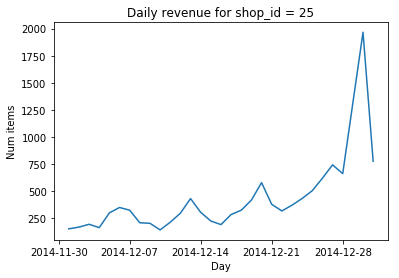

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [106]:
shop_id = 25

total_num_items_sold = sale_12_2014['item_cnt_day']
days = sale_12_2014.index.values

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = sale_12_2014['item_cnt_day'].var(ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [107]:
STUDENT_EMAIL = 'liuyang21cn@yahoo.com'
STUDENT_TOKEN = 'uE0t85F0ekdnBSM0'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [108]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)